In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

%matplotlib inline

In [2]:
#importing the test and train datasets

test = pd.read_csv('data/test.csv')
train = pd.read_csv('data/train.csv')

ctest = test.copy()
ctrain = train.copy()

ctrain['train_test'] = 1
ctest['train_test'] = 0


df = pd.concat([ctrain,ctest],axis=0,sort=False)

In [3]:
#train.head()
#train.shape

#test.head()
#test.shape

df.head()
#df.shape

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [4]:
#finding number of NaN values

data_header = list(df.columns.values)

null_count = df.isnull().sum().tolist()
null_count = {'Coloum name':data_header,'Null Count':null_count}
Dataset_null_count = pd.DataFrame(null_count)
Dataset_null_count

,Coloum name,Null Count
0,PassengerId,0
1,Survived,418
2,Pclass,0
3,Name,0
4,Sex,0
5,Age,263
6,SibSp,0
7,Parch,0
8,Ticket,0
9,Fare,1


In [5]:
#finding the relationship between "Survived","Sex" and "Pclass"

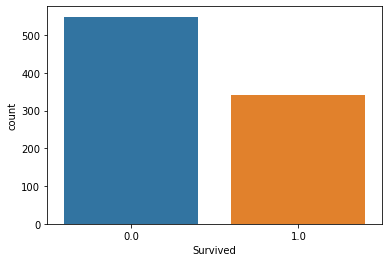

In [6]:
sns.countplot(x='Survived', data=df)

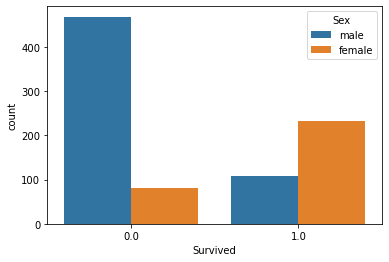

In [7]:
sns.countplot(x='Survived',hue='Sex',data=df)

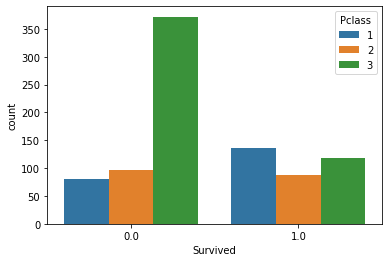

In [8]:
sns.countplot(x='Survived',hue='Pclass',data=df)

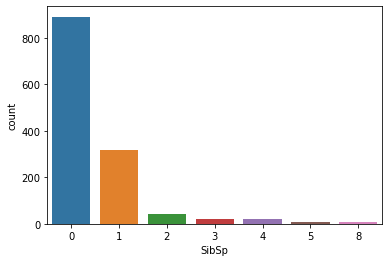

In [9]:
sns.countplot(x='SibSp',data=df)

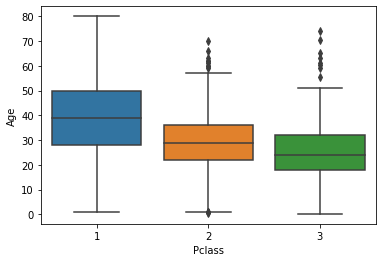

In [10]:
#Ploting a boxplot for 'Age' vs 'Pclass' to find the suitable value for the Filling NaN values 

sns.boxplot(x='Pclass',y='Age',data=df)

In [11]:
#filling NaN values with average Age values

def input_age(Col):
    Age = Col[0]
    Pclass = Col[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [12]:
df['Age'] = df[['Age', 'Pclass']].apply(input_age,axis=1)
df.drop(['Cabin'],axis=1,inplace=True)

In [13]:
columns_with_lowNA = (Dataset_null_count.loc[(Dataset_null_count['Null Count'] > 0) &
                                                (Dataset_null_count['Null Count'] < 25)]).transpose().to_numpy().tolist()[0]

df[columns_with_lowNA] = df[columns_with_lowNA].fillna(df.mode().iloc[0])

In [14]:
encoder = {'male':1, 'female':0, 'C':1, 'Q':2, 'S':3}

df['Sex'] = df['Sex'].map(encoder)
df['Embarked'] = df['Embarked'].map(encoder)

In [15]:
data_header = list(df.columns.values)

null_count = df.isnull().sum().tolist()
null_count = {'Coloum name':data_header,'Null Count':null_count}
Dataset_null_count = pd.DataFrame(null_count)
Dataset_null_count

,Coloum name,Null Count
0,PassengerId,0
1,Survived,418
2,Pclass,0
3,Name,0
4,Sex,0
5,Age,0
6,SibSp,0
7,Parch,0
8,Ticket,0
9,Fare,0


In [16]:
df.drop(['Name','Ticket'],axis=1,inplace=True)

In [17]:
df = df.drop(['PassengerId'],axis=1)

df_train = df[df['train_test']==1]
df_train = df_train.drop(['train_test'],axis=1)

df_test = df[df['train_test']==0]
df_test = df_test.drop(['Survived'],axis=1)
df_test = df_test.drop(['train_test'],axis=1)

In [18]:
survived = df_train['Survived']
df_train = df_train.drop(['Survived'], axis=1)

In [19]:
x_train,x_test,y_train,y_test = train_test_split(df_train,survived,test_size=0.30,random_state =0)

In [20]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression()

In [21]:
p = logmodel.predict(x_test)

In [22]:
accuracy=confusion_matrix(y_test,p)
accuracy

array([[143,  25],
       [ 28,  72]], dtype=int64)

In [23]:
accuracy=accuracy_score(y_test,p)
accuracy

0.8022388059701493

In [24]:
Final_predict = logmodel.predict(df_test)

In [25]:
submission = pd.DataFrame({"PassengerId":test['PassengerId'],"Survived":Final_predict})
submission.to_csv('submission.csv',index=False)

In [26]:
submission.head()

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,1.0


In [27]:
submission.shape

(418, 2)